# **Data Scraping**

In [ ]:
# Import necessary libraries for data manipulation, web scraping, and visualization
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [ ]:

website='https://www.worldometers.info/coronavirus/#countries'
website_url=requests.get(website).text
soup = BeautifulSoup(website_url,'html.parser')

In [ ]:
my_table = soup.find('tbody')

In [ ]:
table_data = []
for row in my_table.findAll('tr'):
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if(len(row_data) > 0):
        data_item = {"Country": row_data[0],
                     "TotalCases": row_data[1],
                     "NewCases": row_data[2],
                     "TotalDeaths": row_data[3],
                     "NewDeaths": row_data[4],
                     "TotalRecovered": row_data[5],
                     "ActiveCases": row_data[6],
                     "CriticalCases": row_data[7],
                     "Totcase1M": row_data[8],
                     "Totdeath1M": row_data[9],
                     "TotalTests": row_data[10],
                     "Tottest1M": row_data[11],
        }
        table_data.append(data_item)

In [ ]:
df = pd.DataFrame(table_data)
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M
0,,\nNorth America\n,"130,804,382",+2,"1,668,841",,"126,253,459","+1,802","2,882,082","7,588",,
1,,\nAsia\n,"221,407,132",+178,"1,552,735",,"205,574,884","+1,944","14,279,513","14,733",,
2,,\nEurope\n,"253,038,478","+27,217","2,096,778",+175,"248,343,443","+27,728","2,598,257","4,596",,
3,,\nSouth America\n,"69,648,744",,"1,364,920",,"66,628,490",,"1,655,334","8,953",,
4,,\nOceania\n,"14,748,731","+1,649","32,429",,"14,555,406",,"160,896",46,,
...,...,...,...,...,...,...,...,...,...,...,...,...
234,227,Tokelau,80,,,,,,80,,"58,055",
235,228,Vatican City,29,,,,29,,0,,"36,295",
236,229,Western Sahara,10,,1,,9,,0,,16,2
237,230,MS Zaandam,9,,2,,7,,0,,,


# **Data Preprocessing and Cleaning**

In [ ]:
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M
0,,\nNorth America\n,"130,804,382",+2,"1,668,841",,"126,253,459","+1,802","2,882,082","7,588",,
1,,\nAsia\n,"221,407,132",+178,"1,552,735",,"205,574,884","+1,944","14,279,513","14,733",,
2,,\nEurope\n,"253,038,478","+27,217","2,096,778",+175,"248,343,443","+27,728","2,598,257","4,596",,
3,,\nSouth America\n,"69,648,744",,"1,364,920",,"66,628,490",,"1,655,334","8,953",,
4,,\nOceania\n,"14,748,731","+1,649","32,429",,"14,555,406",,"160,896",46,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         239 non-null    object
 1   TotalCases      239 non-null    object
 2   NewCases        239 non-null    object
 3   TotalDeaths     239 non-null    object
 4   NewDeaths       239 non-null    object
 5   TotalRecovered  239 non-null    object
 6   ActiveCases     239 non-null    object
 7   CriticalCases   239 non-null    object
 8   Totcase1M       239 non-null    object
 9   Totdeath1M      239 non-null    object
 10  TotalTests      239 non-null    object
 11  Tottest1M       239 non-null    object
dtypes: object(12)
memory usage: 22.5+ KB


In [ ]:
df.isnull()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
234,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Country           0
TotalCases        0
NewCases          0
TotalDeaths       0
NewDeaths         0
TotalRecovered    0
ActiveCases       0
CriticalCases     0
Totcase1M         0
Totdeath1M        0
TotalTests        0
Tottest1M         0
dtype: int64

In [ ]:
df.columns

Index(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'CriticalCases', 'Totcase1M',
       'Totdeath1M', 'TotalTests', 'Tottest1M'],
      dtype='object')

In [ ]:
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M
0,,\nNorth America\n,130804382,+2,1668841.0,,"126,253,459","+1,802","2,882,082","7,588",,
1,,\nAsia\n,221407132,+178,1552735.0,,"205,574,884","+1,944","14,279,513","14,733",,
2,,\nEurope\n,253038478,"+27,217",2096778.0,+175,"248,343,443","+27,728","2,598,257","4,596",,
3,,\nSouth America\n,69648744,,1364920.0,,"66,628,490",,"1,655,334","8,953",,
4,,\nOceania\n,14748731,"+1,649",32429.0,,"14,555,406",,"160,896",46,,
...,...,...,...,...,...,...,...,...,...,...,...,...
234,227,Tokelau,80,,0.0,,,,80,,"58,055",
235,228,Vatican City,29,,0.0,,29,,0,,"36,295",
236,229,Western Sahara,10,,1.0,,9,,0,,16,2
237,230,MS Zaandam,9,,2.0,,7,,0,,,


# **Data Analysis and Visualization**

In [ ]:
df = pd.DataFrame(table_data)
df['NewDeaths'] = df['NewDeaths'].str.replace(',', '').replace('', '0')
df['NewDeaths'] = pd.to_numeric(df['NewDeaths'], errors='coerce').fillna(0).astype(int)


NewDeathsMedian = df['NewDeaths'].median()
NewDeathsMean = df['NewDeaths'].mean()
NewDeathsMode = df['NewDeaths'].mode()
NewDeathsStDev = df['NewDeaths'].std()

print("The average of New Deaths is ", NewDeathsMean)
print("The median of New Deaths is ", NewDeathsMedian)
print("The mode of New Deaths is ", NewDeathsMode)
print("The standard deviation of New Deaths is ", NewDeathsStDev)

The average of New Deaths is  87547.30543933055
The median of New Deaths is  2250.0
The mode of New Deaths is  0    0
Name: NewDeaths, dtype: int64
The standard deviation of New Deaths is  507203.6671978302


(array([232.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0. ,  697460.2, 1394920.4, 2092380.6, 2789840.8, 3487301. ,
        4184761.2, 4882221.4, 5579681.6, 6277141.8, 6974602. ]),
 <BarContainer object of 10 artists>)

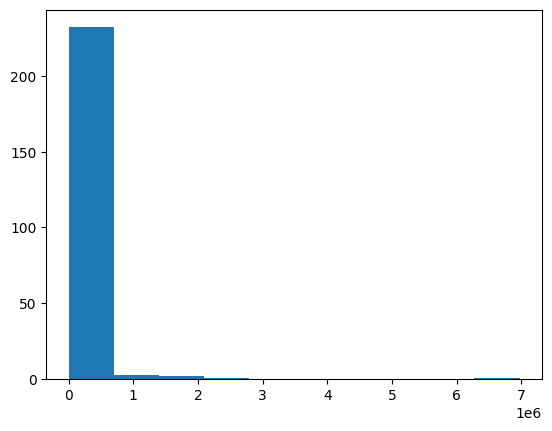

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['NewDeaths'])

(array([234.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([9.00000000e+00, 7.02507413e+07, 1.40501474e+08, 2.10752206e+08,
        2.81002938e+08, 3.51253670e+08, 4.21504403e+08, 4.91755135e+08,
        5.62005867e+08, 6.32256600e+08, 7.02507332e+08]),
 <BarContainer object of 10 artists>)

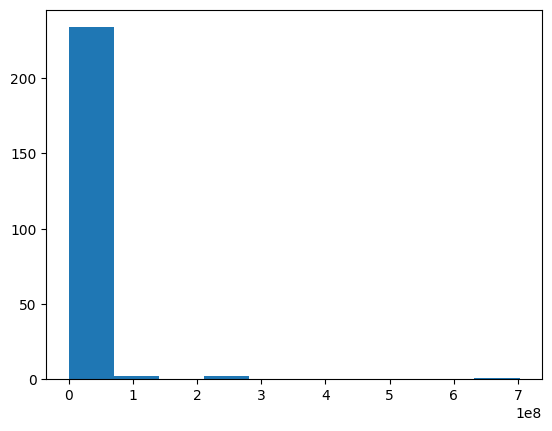

In [ ]:
df = pd.DataFrame(table_data)
df['NewCases'] = df['NewCases'].str.replace(',', '').replace('', '0')
df['NewCases'] = pd.to_numeric(df['NewCases'], errors='coerce').fillna(0).astype(int)

plt.hist(df['NewCases'])

In [ ]:
from scipy.stats import skew
x1 = skew(df['NewDeaths'].astype(float))
x2 = skew(df['NewCases'].astype(float))
print(f"Skewness of New Deaths is  {x1:.2f}")
print(f"Skewness of New Cases is  {x2:.2f}")

Skewness of New Deaths is  11.15
Skewness of New Cases is  11.03


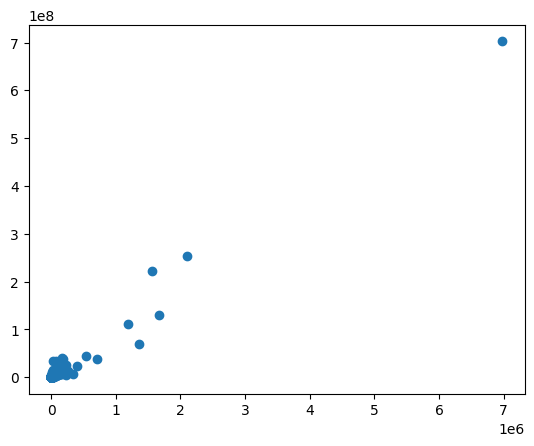

In [ ]:
plt.scatter(df['NewDeaths'].astype(float), df['NewCases'].astype(float))

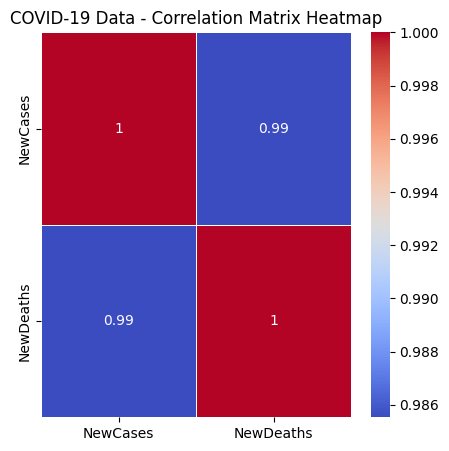

In [ ]:
df['NewDeaths'] = df['NewDeaths'].astype(str).str.replace(',', '').replace('', '0')
df['NewDeaths'] = pd.to_numeric(df['NewDeaths'], errors='coerce').fillna(0).astype(int)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('COVID-19 Data - Correlation Matrix Heatmap')
plt.show()

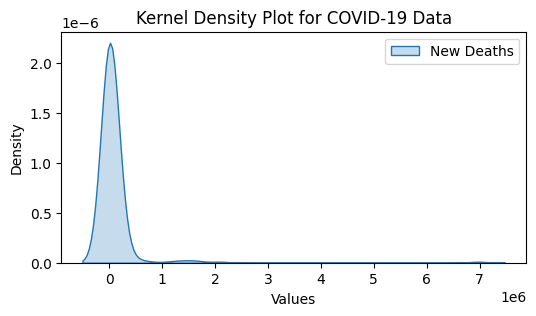

In [ ]:
df['NewDeaths'] = df['NewDeaths'].astype(str).str.replace(',', '').replace('', '0')
df['NewDeaths'] = pd.to_numeric(df['NewDeaths'], errors='coerce').fillna(0).astype(int)
plt.figure(figsize=(6, 3))
sns.kdeplot(df['NewDeaths'], fill=True, label='New Deaths')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot for COVID-19 Data')
plt.legend()
plt.show()